In [4]:
# coding=gbk
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.sparse import hstack
x,y=load_svmlight_file("C:/Users/Bean/Desktop/机器学习实验课/australian_scale.txt")
train_x,cv_x,train_y,cv_y=train_test_split(x,y,test_size=0.2,random_state=0)

def lossFunction(theta,x,y,reg):
    num_train=x.shape[0]
    num_class=theta.shape[1]
    scores=x.dot(theta)
    correct_class_scores = scores[range(num_train), list(y)].reshape(-1, 1)
    margins = np.maximum(0, scores - correct_class_scores + 1)
    margins[range(num_train), list(y)] = 0
    loss = np.sum(margins) / num_train + 0.5 * reg * np.sum(theta * theta)
    coeff_mat = np.zeros((num_train, num_class))
    coeff_mat[margins > 0] = 1
    coeff_mat[range(num_train), list(y)] = 0
    coeff_mat[range(num_train), list(y)] = - np.sum(coeff_mat, axis=1)

    dw = x.T.dot(coeff_mat)
    dw = dw / num_train + reg * theta
    return loss, dw


class LinearClassifier:
    def __init__(self):
        self.theta = None
        self.le = LabelEncoder()

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=2000, batch_size=200, verbose=False):
        num_train, dim = X.shape #维度
        y = self.le.fit_transform(y)


        num_classes = int(np.max(y)) + 1
        if self.theta is None:
            print(dim, num_classes)
            self.theta = 0.001 * np.random.randn(dim, num_classes)

        train_loss = []
        for i in range(num_iters):
            batch_idx = np.random.choice(num_train, batch_size, replace=True)
            X_batch = X[batch_idx]
            y_batch = y[batch_idx]

            loss, grad = self.loss(X_batch, y_batch, reg)

            train_loss.append(loss)

            self.theta += -1 * learning_rate * grad

            if verbose and i % 100 == 0:
                print('iteration %d / %d: loss %f' % (i, num_iters, loss))

        return train_loss

    def predict(self, X):
        y_pred = np.zeros(X.shape[1])
        scores = X.dot(self.w)
        y_pred = np.argmax(scores, axis=1)
        y_pred = self.le.inverse_transform(y_pred)
        return y_pred

class LinearSVM(LinearClassifier):
    def loss(self, X_batch, y_batch, reg):
        return lossFunction(self.theta, X_batch, y_batch, reg)

a = LinearSVM()
train_loss = a.train(train_x, train_y, verbose=True)
cv_loss = LinearSVM().train(cv_x, cv_y)


14 2
iteration 0 / 2000: loss 1.000061
iteration 100 / 2000: loss 0.808472
iteration 200 / 2000: loss 0.618303
iteration 300 / 2000: loss 0.581711
iteration 400 / 2000: loss 0.504592
iteration 500 / 2000: loss 0.414244
iteration 600 / 2000: loss 0.436800
iteration 700 / 2000: loss 0.391842
iteration 800 / 2000: loss 0.424588
iteration 900 / 2000: loss 0.353860
iteration 1000 / 2000: loss 0.304708
iteration 1100 / 2000: loss 0.366532
iteration 1200 / 2000: loss 0.348261
iteration 1300 / 2000: loss 0.317323
iteration 1400 / 2000: loss 0.293189
iteration 1500 / 2000: loss 0.358301
iteration 1600 / 2000: loss 0.291306
iteration 1700 / 2000: loss 0.293177
iteration 1800 / 2000: loss 0.322220
iteration 1900 / 2000: loss 0.366109
14 2


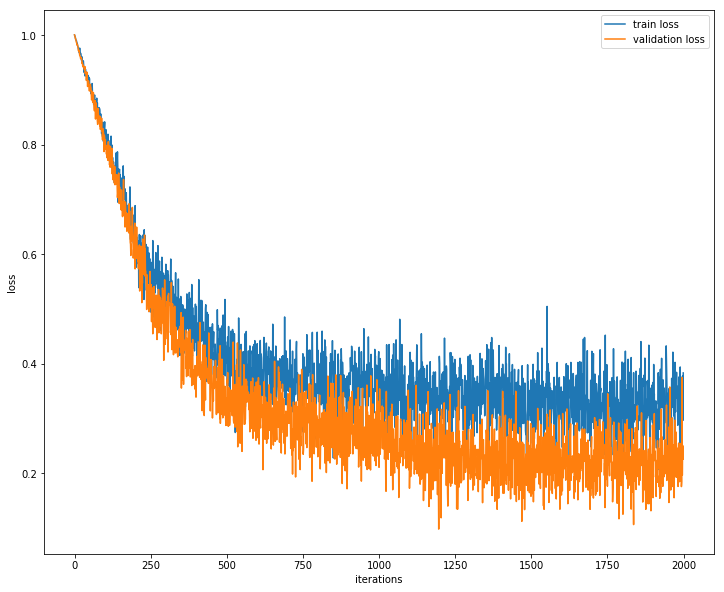

In [5]:
plt.figure('loss', figsize=(12, 10))
plt.plot(train_loss, label='train loss')
plt.plot(cv_loss, label='validation loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()